<a href="https://colab.research.google.com/github/ahcamachod/2145-data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Leyendo los datos
url = '/content/drive/MyDrive/Math_with_python/precios_casas.csv'

In [3]:
#Cuáles factores fueron colectados
datos = pd.read_csv(url,)
datos.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [5]:
datos = datos.drop(columns= 'Id')

In [6]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [7]:
# Correlación
corr = datos.corr()

In [8]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


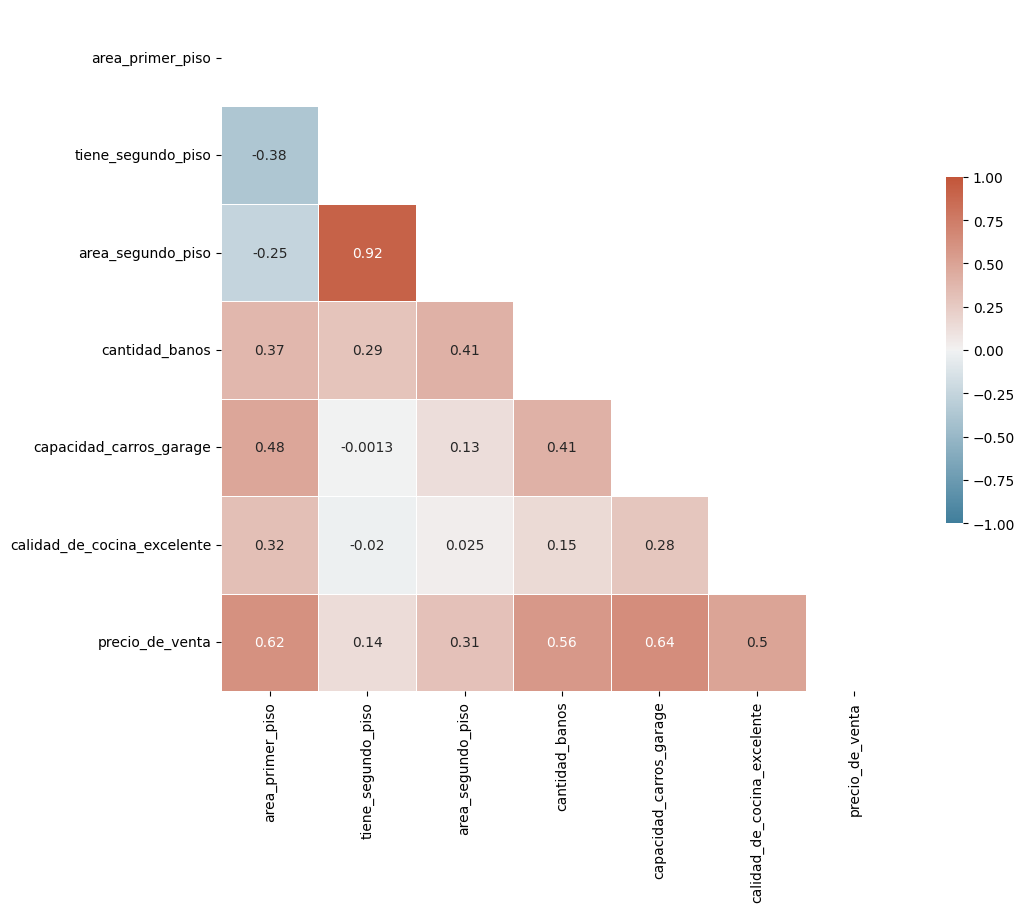

In [9]:
# Actividad
# Cuáles factores están más correlacionados?
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, annot= True, cbar_kws={"shrink": .5})

plt.show()

Consejo: Presta atención a los puntos a continuación para un análisis completo:


*   Intensidad: se refiere a la fuerza de la relación entre las variables medidas. correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

*   Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

## Relacionando variables

In [10]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

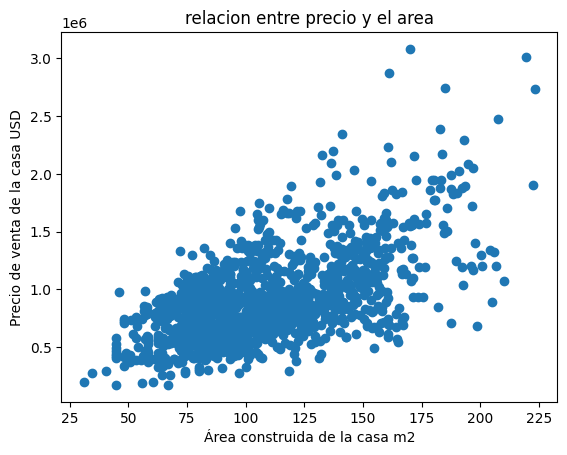

In [11]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title ('relacion entre precio y el area')
plt.xlabel('Área construida de la casa m2')
plt.ylabel('Precio de venta de la casa USD')
plt.show()

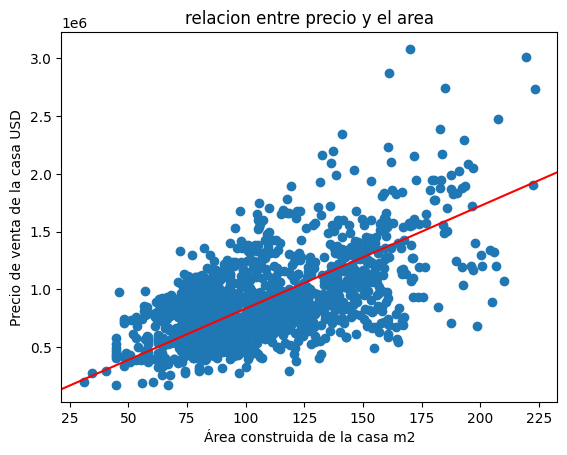

In [12]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40, 300000), xy2=(175, 1500000), color='red')
plt.title ('relacion entre precio y el area')
plt.xlabel('Área construida de la casa m2')
plt.ylabel('Precio de venta de la casa USD')
plt.show()

## Mejor recta

In [13]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline="ols", trendline_color_override='red')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

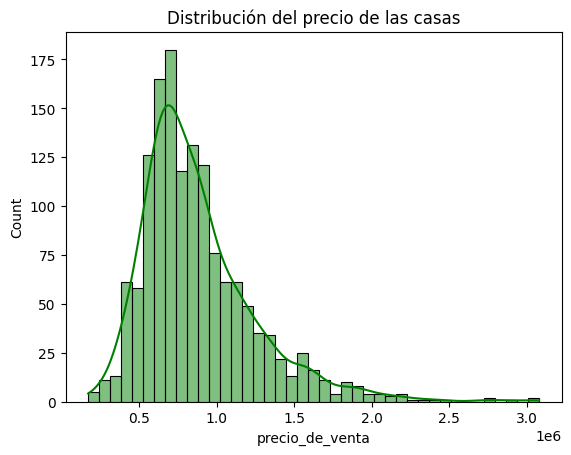

In [14]:
#Quién es nuestra variable de respuesta?
sns.histplot(datos['precio_de_venta'],kde=True,color='green')
plt.title('Distribución del precio de las casas')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [15]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [16]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train
df_train.head()

,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1303,65.7732,0,0.0000,1,0,0,406725.0
326,55.3684,1,55.3684,1,189,0,384540.0
386,74.6916,1,107.4853,2,560,0,1059950.0
615,103.6764,0,0.0000,1,440,0,788800.0
236,94.2006,1,67.8170,2,457,0,958885.0


In [17]:
# import ols
from statsmodels.formula.api import ols

In [18]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [19]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [20]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        03:18:11   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [21]:
# observando el R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendiendo el resíduo

In [22]:
# Quiénes son los residuos?
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


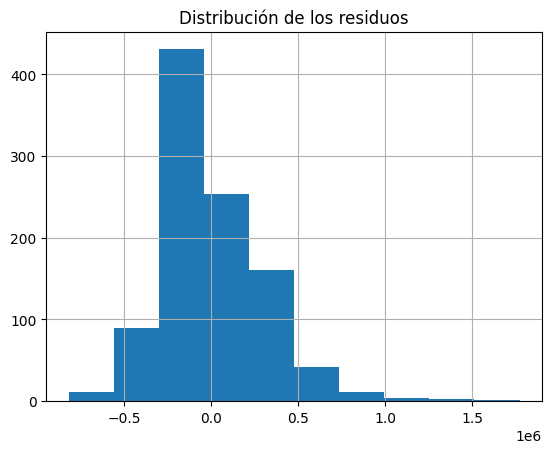

In [23]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [24]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [25]:
# importando el r2_score
from sklearn.metrics import r2_score

In [26]:
# mostrando el resultado de r²
print(f'R²: {round(r2_score(y_test, y_predict),2)}')

R²: 0.39


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

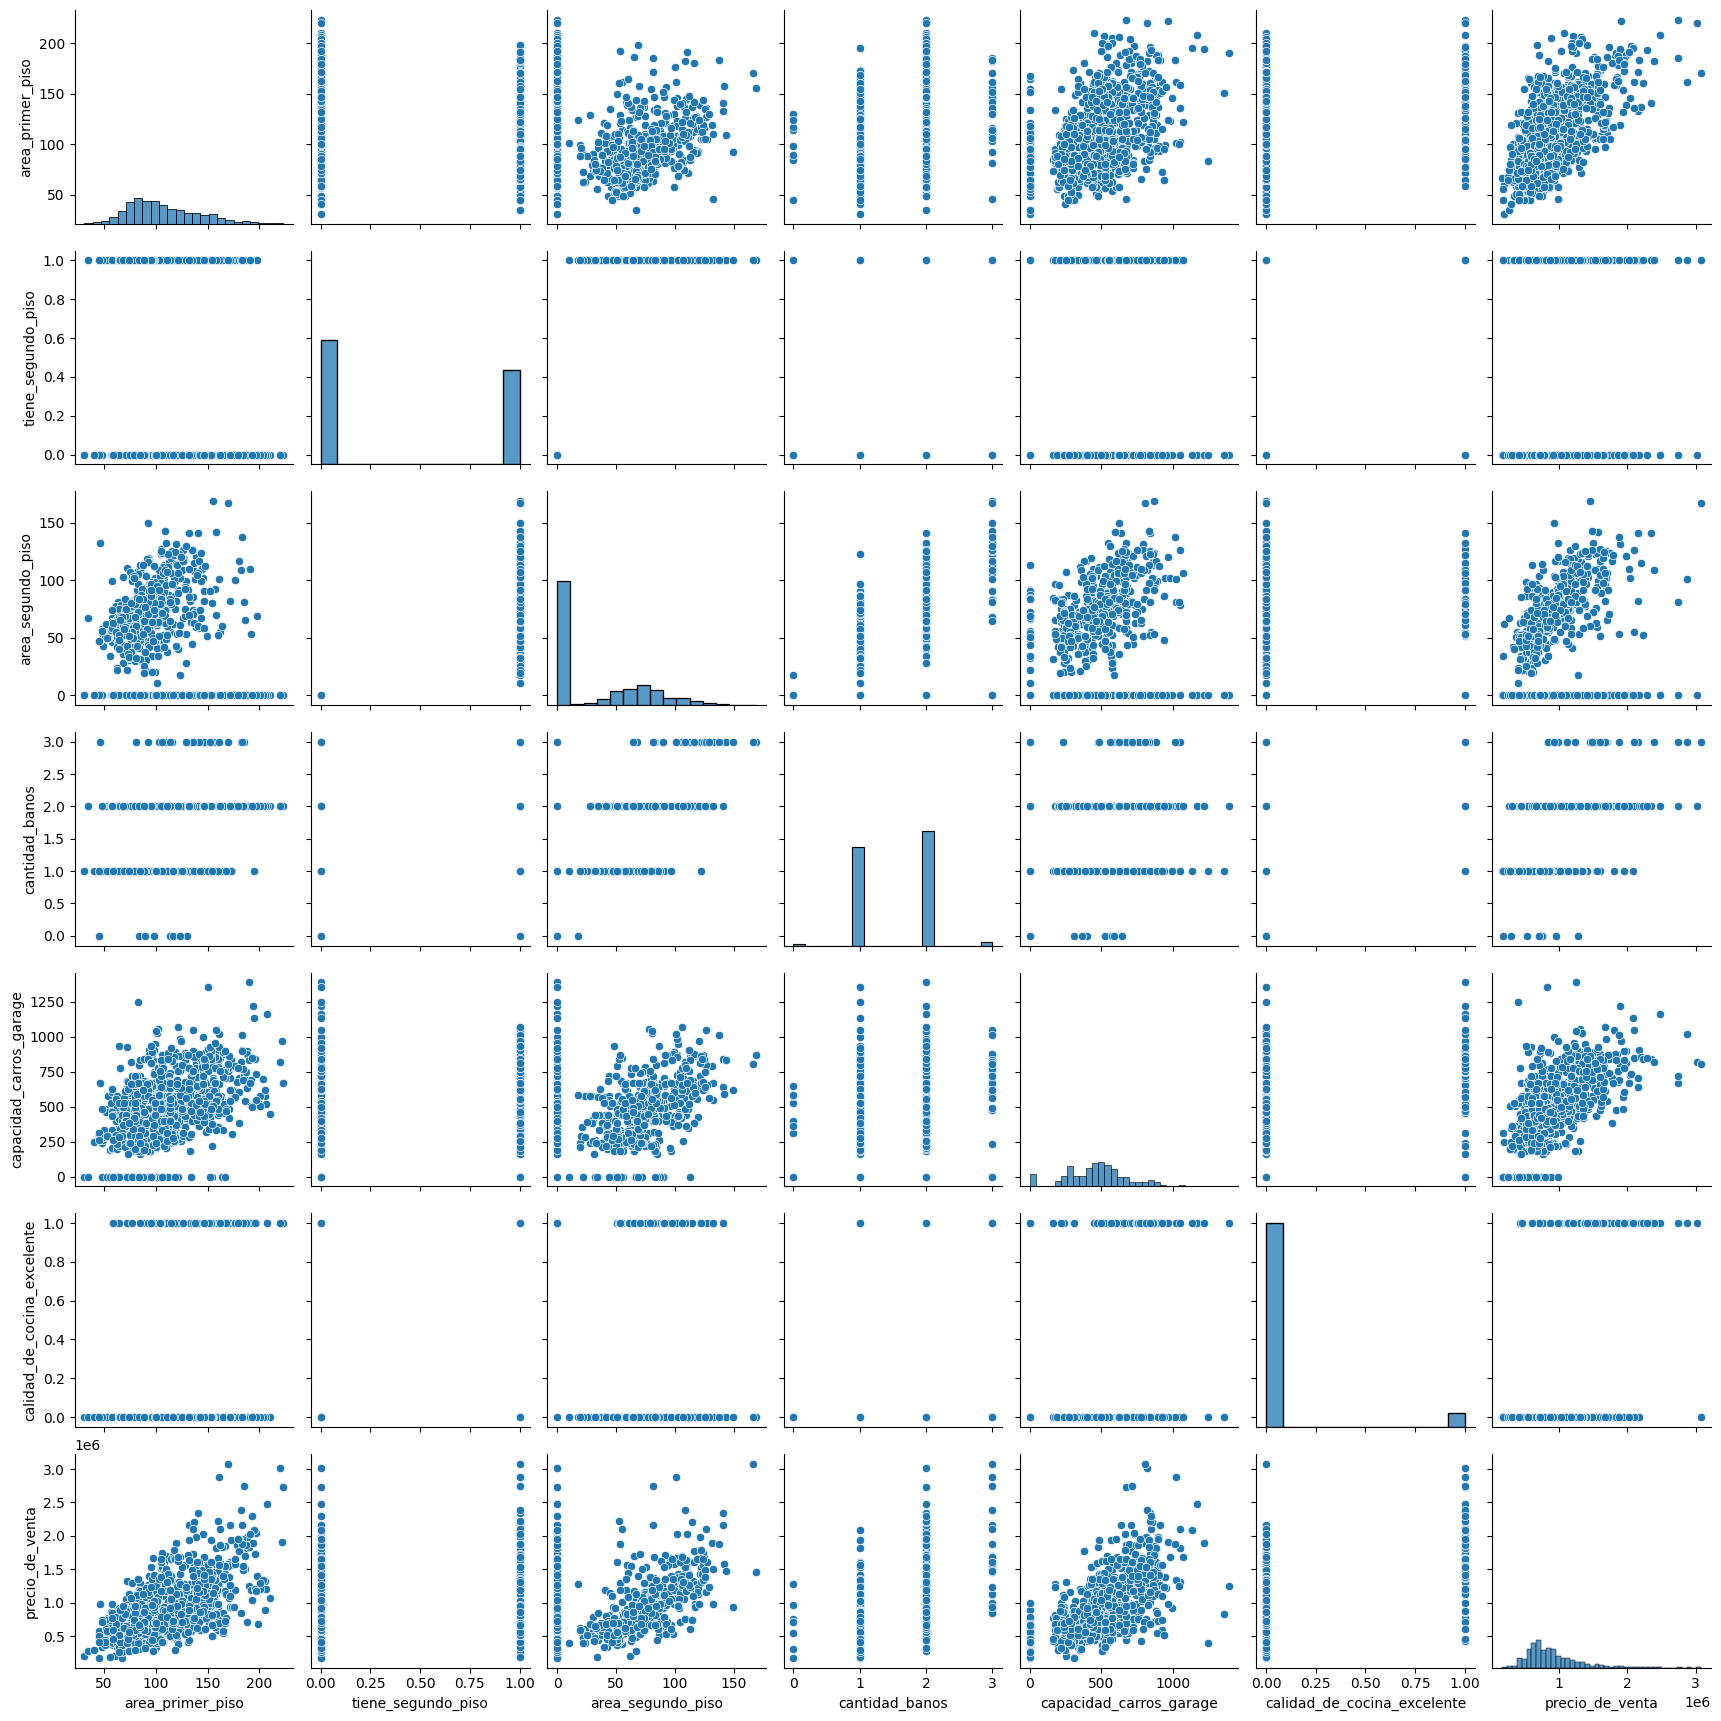

In [27]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)
plt.show()

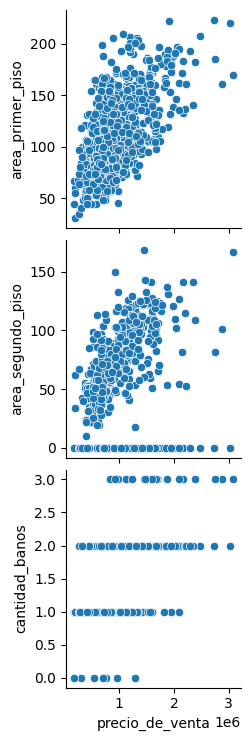

In [28]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'], x_vars=['precio_de_venta'])
plt.show()

## Añadiendo factores al modelo

In [29]:
# importando la api de statsmodels
import statsmodels.api as sm

In [30]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [31]:
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [32]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [33]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [34]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, X_train[['const', 'area_primer_piso','tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']]).fit()

In [35]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]
for i,j in enumerate(modelos):
  print(f'*******************************************************************************\n************* el modelo {i} tiene el siguiente resumen **************************\n')
  print(j.summary(),'\n\n')

*******************************************************************************
************* el modelo 0 tiene el siguiente resumen **************************

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        03:18:19   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t

In [36]:
for i,j in enumerate(modelos):
  print(f'el modelo de determinación R2 del modelo {i}: {j.rsquared.round(2)}')

el modelo de determinación R2 del modelo 0: 0.38
el modelo de determinación R2 del modelo 1: 0.74
el modelo de determinación R2 del modelo 2: 0.71
el modelo de determinación R2 del modelo 3: 0.65


En la clase sobre comparación de modelos de regresión lineal, exploramos cómo evaluar y seleccionar el modelo más adecuado utilizando el R² y otros criterios. Además de la selección manual que discutimos, existen métodos automáticos de selección de variables que pueden ser extremadamente útiles en situaciones donde el número de variables explicativas es grande. Estos métodos, como stepwise, backward y forward selection, siguen criterios predefinidos para agregar o eliminar variables del modelo de forma iterativa. Explora a continuación los métodos automáticos de selección de variables, que buscan equilibrar la complejidad del modelo y su capacidad explicativa.


*   El método de forward selection comienza con un modelo sin variables explicativas y agrega una a una, eligiendo en cada paso la variable que más mejora el modelo de acuerdo con un criterio estadístico específico, como el menor valor de p-valor o el mayor aumento en el R² ajustado.



*   El backward selection inicia con todas las variables posibles en el modelo y, de manera iterativa, elimina la variable que menos contribuye al modelo, nuevamente basándose en criterios como el p-valor o el impacto en el R² ajustado.


*   El stepwise selection es una combinación de los dos métodos anteriores, donde las variables pueden ser agregadas o eliminadas en cada paso, dependiendo de su contribución a la mejora del modelo.



Estos métodos de selección automática son herramientas poderosas que ayudan en la identificación del modelo más parsimonioso, es decir, aquel que puede explicar los datos de manera eficiente sin ser excesivamente complejo. Sin embargo, es crucial que el científico de datos comprenda y supervise el proceso, ya que la elección automática puede, a veces, introducir sesgo o sobreajuste, especialmente si el criterio de selección no es bien elegido o si el modelo no es validado adecuadamente con datos nuevos o de prueba.

## Comparando los modelos
Cuál es el modelo?


In [37]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.
En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:


1. análisis inicial con el PairPlot de Seaborn;
2. construir modelos de regresión lineal; y
3. realizar la comparación de estos modelos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso

In [38]:
url2 = '/content/drive/MyDrive/Math_with_python/hoteis.csv'

df_exercise = pd.read_csv(url2)
df_exercise.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


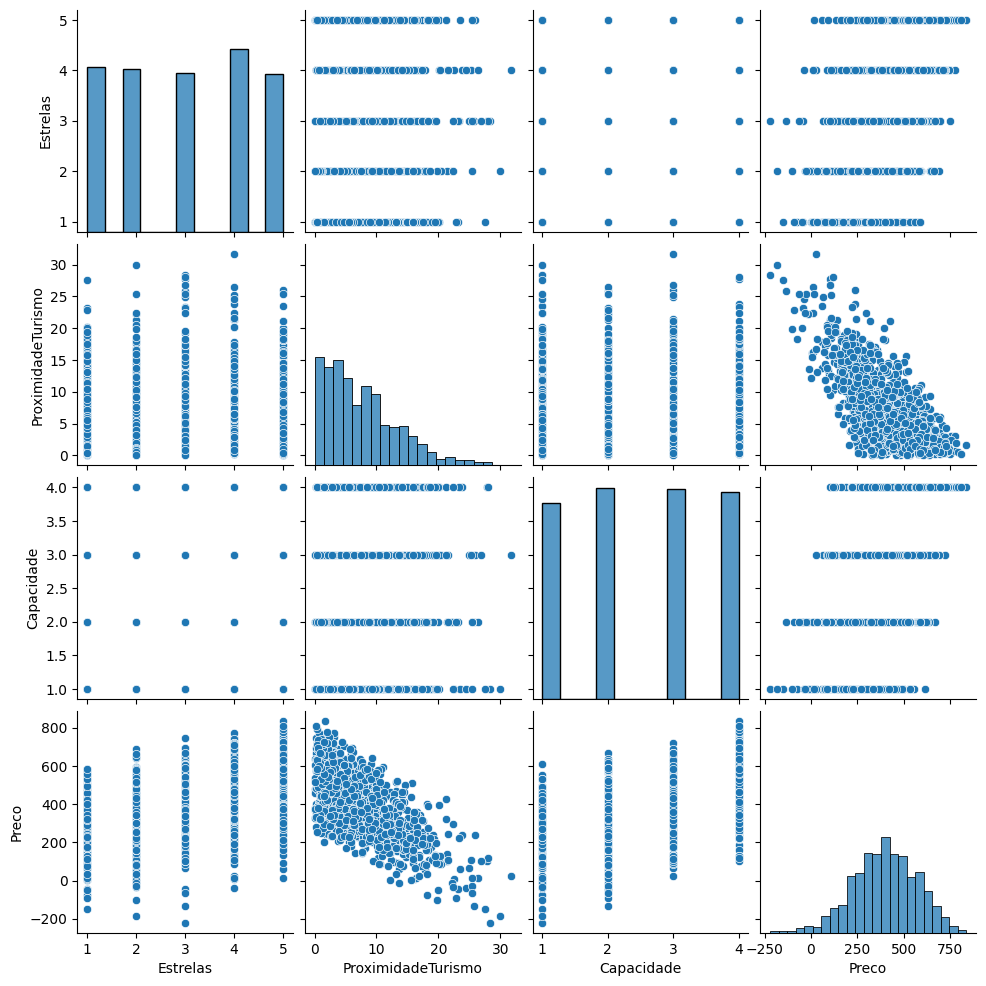

In [39]:
sns.pairplot(df_exercise)
plt.show()

In [40]:
df_exercise.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X1 = df_exercise[['Estrelas']]
X1 = sm.add_constant(X1)
y = df_exercise['Preco']

modelo_1_exercise = sm.OLS(y, X1).fit()

X2 = df_exercise[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2_exercise = sm.OLS(y, X2).fit()

X3 = df_exercise[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3_exercise = sm.OLS(y, X3).fit()

In [55]:
print("Modelo 1 - Apenas 'Estrelas':")
print(modelo_1_exercise.summary())
print("\nModelo 2 - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2_exercise.summary())
print("\nModelo 3 - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3_exercise.summary())

Modelo 1 - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           6.09e-40
Time:                        03:26:59   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517 

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [41]:
# Añadiendo una constante en X_test


In [42]:
# Previsión con el modelo 3


In [43]:
# Cuál es el r² de la previsión?


In [44]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [45]:
#Nuevo inmueble


In [46]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [47]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [48]:
# Leyendo varias casas?


In [49]:
# Añadiendo una constante


In [50]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [51]:
# importar el VIF de statsmodel


In [52]:
# VIF 1


In [53]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">